1. What is Simple Linear Regression?
- Simple linear regression is a statistical method for modeling the linear relationship between two continuous variables: one dependent variable (the outcome) and one independent variable (the predictor). It works by fitting a straight line of best fit to the data points to estimate how changes in the independent variable affect the dependent variable, allowing for predictions to be made. The "simple" in simple linear regression refers to having only one independent variable.

2. : What are the key assumptions of Simple Linear Regression?
- The key assumptions for Simple Linear Regression are: Linearity, a linear relationship between variables; Independence of Errors, where errors are not correlated with each other; Homoscedasticity, meaning the variance of errors is constant; and Normality of Residuals, where the errors are normally distributed. These assumptions ensure the model provides accurate and reliable results.

3.  What is heteroscedasticity, and why is it important to address in regression
models?
- Heteroscedasticity is a regression problem where the variance of the residuals (the errors in the model's predictions) is not constant across all values of the independent variables. It's important to address because it violates a key assumption of Ordinary Least Squares (OLS) regression, leading to unreliable standard errors, less precise coefficient estimates, and potentially invalid hypothesis tests and confidence intervals. This makes the model's results less dependable and reduces its ability to accurately represent the true relationship in the data.

4. What is Multiple Linear Regression?
- Multiple linear regression (MLR) is a statistical technique used to model the linear relationship between one dependent variable and two or more independent variables, helping to predict the outcome and assess the influence of each predictor on the response. It extends simple linear regression by incorporating multiple factors to provide a more comprehensive understanding of how various elements collectively and individually affect a singular outcome.

5. What is polynomial regression, and how does it differ from linear
regression?
- Polynomial regression models a non-linear relationship by adding polynomial terms (like x², x³) to a linear model, while linear regression assumes a straight-line relationship between variables. The key difference is that linear regression uses a first-degree polynomial equation to fit a straight line, whereas polynomial regression uses higher-degree polynomials to fit curves to the data, allowing for more complex patterns but increasing the risk of overfitting.




Fitted Line: Y = 1.98X + 0.18


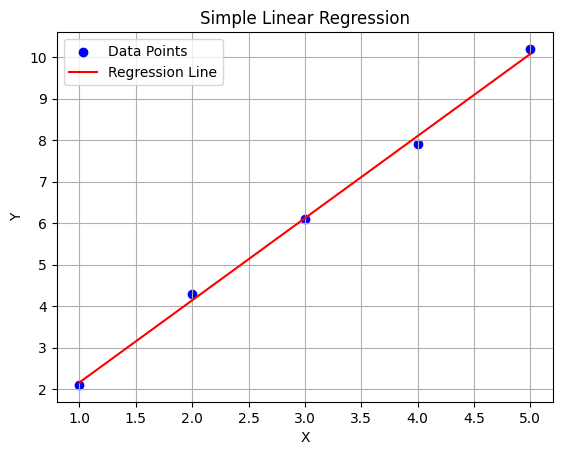

In [1]:
'''
6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Fitted Line: Y = {slope:.2f}X + {intercept:.2f}")

# Predict values for plotting the regression line
Y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
'''
7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
'''

import numpy as np
from sklearn.linear_model import LinearRegression

# Feature data
area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]

# Target variable
price = [250000, 300000, 320000, 370000]

# Combine features into a 2D array
X = np.column_stack((area, rooms))  # Shape: (4, 2)
Y = np.array(price)

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print(f"Area coefficient: {coefficients[0]:.2f}")
print(f"Rooms coefficient: {coefficients[1]:.2f}")
print(f"Intercept: {intercept:.2f}")

# Predicting the prices using the fitted model
Y_pred = model.predict(X)

print("\nPredicted Prices:")
for i, pred in enumerate(Y_pred):
    print(f"Sample {i+1}: Predicted = {pred:.2f}, Actual = {Y[i]}")


Model Coefficients:
Area coefficient: 63.16
Rooms coefficient: 34736.84
Intercept: 103157.89

Predicted Prices:
Sample 1: Predicted = 248421.05, Actual = 250000
Sample 2: Predicted = 302105.26, Actual = 300000
Sample 3: Predicted = 321052.63, Actual = 320000
Sample 4: Predicted = 368421.05, Actual = 370000


Fitted Polynomial: Y = 0.20X² + 1.94X + 0.06


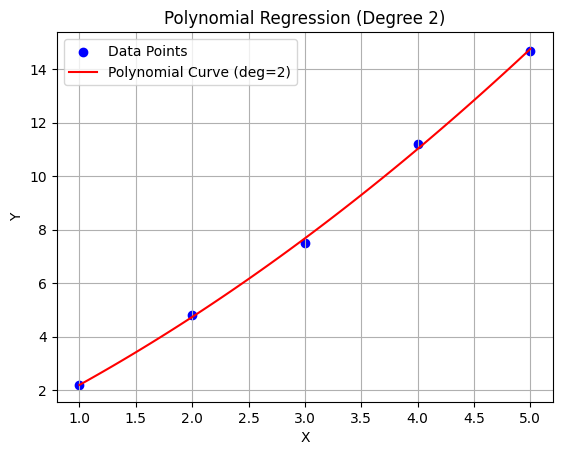

In [3]:
'''
8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Adds x^2 and x^1 terms

# Fit the model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values for smoother curve plotting
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Print equation of the polynomial
coefs = model.coef_
intercept = model.intercept_
print(f"Fitted Polynomial: Y = {coefs[2]:.2f}X² + {coefs[1]:.2f}X + {intercept:.2f}")

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_range, Y_pred, color='red', label='Polynomial Curve (deg=2)')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()




Residuals:
X = 10, Actual Y = 15, Predicted Y = 18.00, Residual = -3.00
X = 20, Actual Y = 35, Predicted Y = 29.50, Residual = 5.50
X = 30, Actual Y = 40, Predicted Y = 41.00, Residual = -1.00
X = 40, Actual Y = 50, Predicted Y = 52.50, Residual = -2.50
X = 50, Actual Y = 65, Predicted Y = 64.00, Residual = 1.00


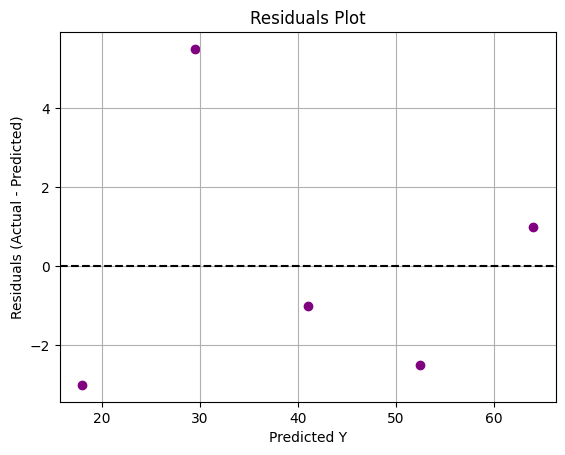

In [4]:
'''
9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Predict
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print residuals
print("Residuals:")
for i in range(len(X)):
    print(f"X = {X[i][0]}, Actual Y = {Y[i]}, Predicted Y = {Y_pred[i]:.2f}, Residual = {residuals[i]:.2f}")

# Plot residuals vs predicted values
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()
